<a href="https://colab.research.google.com/github/equisdel/weather-datasets/blob/main/weather_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO PRÁCTICO ESPECIAL**

## **Integrantes**

*   Adriel Ram Ferrero.
*   Delfina Milagros Ferreri.
*   Emiliana Girardi.



##**Enunciado general**
Se dispone de tres señales (S1, S2 y S3) correspondientes a los valores diarios de temperatura promedio de tres ciudades diferentes (Buenos Aires, Bogotá y Vancouver) durante cierto periodo de tiempo. \
NOTA: los valores de temperatura están expresados en grados celsius, son números enteros para simplificar su uso en este trabajo y se los puede considerar como representativos del comportamiento de las temperaturas diarias en cada ciudad. \
**El TPE consiste en la resolución de los siguientes ítems, mediante su implementación computacional y análisis de los resultados obtenidos, de acuerdo a las pautas de desarrollo y de entrega que se indican a continuación.**



### **Fetching de los datasets**
Antes de comenzar a resolver las consignas particulares, utilizamos la librería `requests` para recuperar los tres datasets a utilizar en este trabajo. Estos datos fueron previamente almacenados en un [repositorio de Github](https://github.com/equisdel/weather-datasets.git).

Con un procesamiento adicional, obtenemos para cada ciudad una lista de longitud $n$ cuyos elementos son números enteros que representan la temperatura promedio de cada día $i$, siendo $0\leq i<n$.

In [261]:
import numpy as np
import requests

S1_buenosAires = list(map(int,requests.get('https://raw.githubusercontent.com/equisdel/weather-datasets/main/datasets/S1_buenosAires.txt').text.splitlines()))
S2_bogota = list(map(int,requests.get('https://raw.githubusercontent.com/equisdel/weather-datasets/main/datasets/S2_bogota.txt').text.splitlines()))
S3_vancouver = list(map(int,requests.get('https://raw.githubusercontent.com/equisdel/weather-datasets/main/datasets/S3_vancouver.txt').text.splitlines()))
S4_buenosAiresR = list(map(int,requests.get('https://raw.githubusercontent.com/equisdel/weather-datasets/main/datasets/S4_buenosAiresR.txt').text.splitlines()))

# Impresión de los datos completos y ordenados correspondientes a las tres ciudades
print('Average temperature per day in \033[1mBuenos Aires, ARG:\n',S1_buenosAires,'\n',len(S1_buenosAires),'datos.\n')
print('Average temperature per day in \033[1mBogotá, COL:\n',S2_bogota,'\n',len(S2_bogota),'datos.\n')
print('Average temperature per day in \033[1mVancouver, CAN:\n',S3_vancouver,'\n',len(S3_vancouver),'datos.\n')

Average temperature per day in Buenos Aires, ARG:
 [28, 23, 23, 25, 26, 21, 21, 24, 19, 16, 19, 22, 23, 25, 27, 22, 18, 21, 24, 23, 23, 25, 26, 22, 21, 24, 24, 19, 19, 20, 25, 19, 19, 22, 19, 18, 20, 23, 24, 25, 22, 23, 23, 25, 24, 22, 23, 20, 15, 21, 26, 24, 18, 18, 20, 20, 21, 23, 20, 20, 21, 23, 19, 17, 19, 20, 18, 19, 21, 21, 21, 21, 20, 21, 20, 17, 26, 21, 23, 25, 23, 23, 21, 22, 19, 23, 23, 17, 15, 15, 16, 16, 19, 22, 24, 21, 20, 21, 17, 13, 13, 12, 13, 15, 18, 16, 18, 19, 16, 10, 11, 11, 14, 16, 16, 16, 17, 16, 15, 17, 15, 12, 17, 20, 14, 12, 11, 18, 17, 14, 12, 14, 17, 17, 17, 16, 13, 9, 8, 9, 13, 11, 8, 8, 8, 7, 9, 10, 10, 11, 12, 13, 10, 12, 13, 19, 15, 8, 7, 12, 14, 8, 13, 7, 3, 8, 7, 5, 7, 9, 8, 10, 13, 16, 10, 3, 7, 8, 6, 1, 7, 7, 9, 8, 9, 14, 9, 11, 12, 13, 9, 15, 9, 9, 8, 6, 5, 5, 4, 4, 4, 7, 10, 13, 16, 11, 9, 12, 10, 11, 4, 4, 9, 8, 6, 3, 7, 10, 10, 8, 7, 5, 9, 11, 12, 12, 8, 6, 5, 7, 7, 8, 8, 12, 16, 17, 14, 15, 14, 12, 15, 10, 13, 14, 7, 8, 14, 22, 25, 23, 14, 12, 12

## **Consigna [ 1 ]**
Se requiere hacer diferentes análisis estadísticos a partir de estos valores, por lo que se solicita obtener:

1. Media y desvío de cada una de las señales. Analizar y comparar.
2. Factor de correlación cruzada para cada par de señales. Analizar y comparar.


---
### **Medidas de tendencia central y dispersión**

**Media Aritmética**

Analíticamente, la media aritmética para una variable estocástica $X$,
que toma los valores $x1..xn$ con las respectivas probabilidades $p1..pn$,
se calcula como **$<X> \, = ∑_{i=1}^{n} x ⋅ p(x)$**. \
Dado que inicialmente no conocemos las probabilidades, nuestro método calcula la media aritmética de una manera más *directa*, recorriendo la fuente elemento a elemento para calcular la sumatoria de todas las temperaturas y luego dividir dicho valor por la cantidad total de datos. \
Esto da como resultado la temperatura promedio en determinada ciudad a lo largo del tiempo.



**Desvío Estándar**

El desvío estándar para $X$, haciendo provecho de la implementación del método que retorna la media, se calcula como:
**$σ(X) = \sqrt{<x^2> \cdot <X>^2}$**

#### **Código**

In [262]:
# Cálculo de la media aritmética
def getMedia(data, pow = 1):
  suma = 0
  for i in data:
    suma += i**pow           # pow = 1 por defecto, pow = 2 es utilizado en cálculo de desvío
  return suma / len(data)

# Cálculo del desvío estándar
def getDesvio(data):
  media_del_cuadrado = getMedia(data,2)
  media_al_cuadrado = getMedia(data)**2
  return (media_del_cuadrado - media_al_cuadrado)**(1/2)

# Obtención de las métricas de la fuente
def getStats(data,ciudad):
  stats = {'nombre_ciudad': f"{ciudad}"}
  precision = 1 # digitos después de la coma para calc
  stats['media arit.'] = round(getMedia(data),precision)
  stats['desvío est.'] = round(getDesvio(data),precision)
  stats['max_temp'] = max(data)
  stats['min_temp'] = min(data)
  stats['#elements'] = len(data)
  return stats

# Muestra las estadísticas de todas las ciudades
def displayStats(stats):
  for s in stats:
    print(f"CIUDAD DE {s['nombre_ciudad'].upper()}")
    for field in s:
      if field != 'nombre_ciudad':
        print(field+'\t'+str(s[field]))
    print()

# Cálculo de las métricas para las tres ciudades
S1_stats = getStats(S1_buenosAires,'Buenos Aires')
S2_stats = getStats(S2_bogota,'Bogotá')
S3_stats = getStats(S3_vancouver,'Vancouver')

# Display de las métricas
stats = [S1_stats,S2_stats,S3_stats]
displayStats(stats)

CIUDAD DE BUENOS AIRES
media arit.	16.5
desvío est.	6.0
max_temp	31
min_temp	1
#elements	6940

CIUDAD DE BOGOTÁ
media arit.	12.9
desvío est.	1.1
max_temp	19
min_temp	8
#elements	6940

CIUDAD DE VANCOUVER
media arit.	10.1
desvío est.	5.6
max_temp	28
min_temp	-9
#elements	6940



#### **Representación visual**
- Generamos histogramas para una visualización general de los datos de las tres ciudades.
- Los histogramas se encuentran en la misma escala con respecto del eje x.
- Representamos la media de cada distribución, calculada previamente, en color rojo.

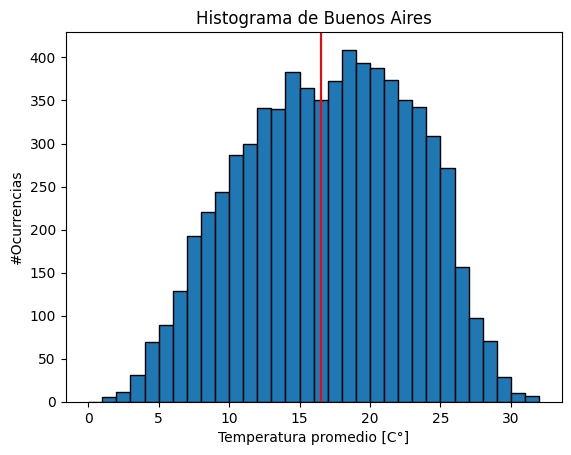

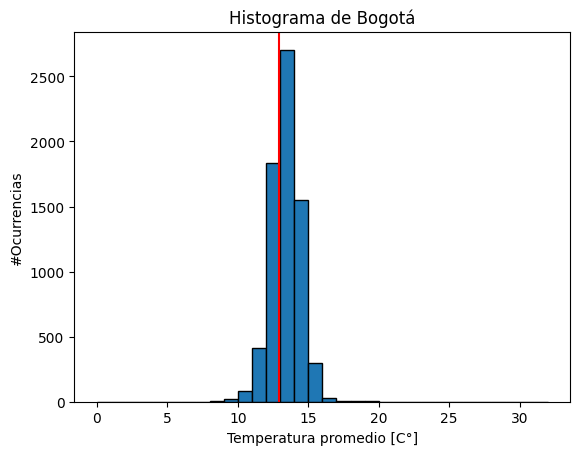

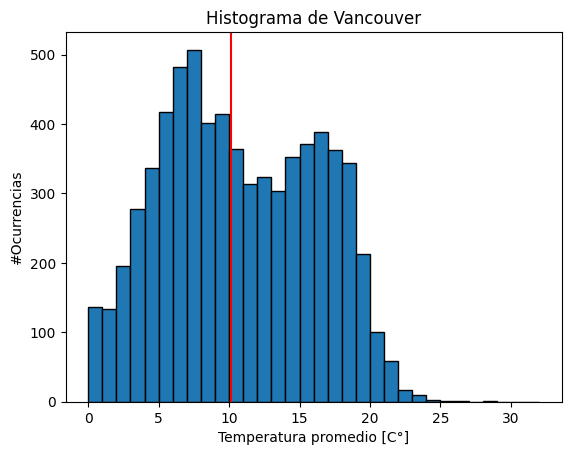

In [263]:
import matplotlib.pyplot as plt

def getHistograma(data,stats):
  plt.hist(data, bins=range(0,33), edgecolor='black')
  media = stats['media arit.']
  plt.axvline(x = media, color='red', linestyle='-', label=f'Constant = {media}')
  plt.title(f"Histograma de {stats['nombre_ciudad']}")
  plt.xlabel('Temperatura promedio [C°]')
  plt.ylabel('#Ocurrencias')
  plt.show()
  print()

getHistograma(S1_buenosAires,S1_stats)
getHistograma(S2_bogota,S2_stats)
getHistograma(S3_vancouver,S3_stats)

---
### **Factor de correlación cruzada**

- El factor de correlación cruzada lo calculamos de manera tradicional aprovechando los cálculos previos de media y desvío.
La fórmula empleada es: $\sum_{i=1}^{n}\, \frac {(X_i-<X>) \,\cdot\, (Y_i\,-<Y>)}{σ(X)\cdot σ(Y)}$
- Los resultados de esta expresión se encuentran dentro del rango [-1,1].
- Posteriormente mostramos los resultados de las 3 combinaciones posibles en una matriz simétrica.

In [264]:
from tabulate import tabulate

# Cálculo de factor de correlacion cruzada: el orden de x e y es indiferente
def correlacionCruzada(x, stats_x, y, stats_y):
  suma = 0
  n = len(x)      # ambos tienen igual longitud, es indistinto usar x o y
  for i in range(n-1):
    suma = suma + (x[i] - stats_x['media arit.']) * (y[i] - stats_y['media arit.']) / (stats_x['desvío est.']*stats_y['desvío est.'])
  return suma/n

# Cálculo de la correlación cruzada para las 9 (3) combinaciones posibles
factor_CC = np.ones((3,3))
ciudades = [S1_buenosAires, S2_bogota, S3_vancouver]
for i in range(len(ciudades)):
  for j in range(len(ciudades)):
    if ciudades[i]!=ciudades[j]:
      factor_CC[i][j] = correlacionCruzada(ciudades[i], stats[i], ciudades[j], stats[j])

print(tabulate(factor_CC, headers=["BsAs", "Bog", "Vanc"], showindex=["BsAs", "Bog", "Vanc"], tablefmt="simple"))

            BsAs         Bog        Vanc
----  ----------  ----------  ----------
BsAs   1          -0.0513525  -0.731638
Bog   -0.0513525   1           0.0381168
Vanc  -0.731638    0.0381168   1


#### **Representación visual**
- Generamos diagramas de dispersión para visualizar la relación entre cada par de fuentes e identificar la correspondencia con las correlaciones calculadas.
- La escala de colores es un indicador de la cantidad de ocurrencias en ese punto del eje cartesiano.
- Como era de esperar, el primer y el último gráfico no muestran una tendencia clara en el comportamiento de los datos de ambas fuentes, mientras que el gráfico del medio presenta una especie de diagonal que implica un factor de correlación más fuerte.
- Esto nos indica que aquellos días en los que la temperatura en Buenos Aires es alta, en Vancouver suele ser baja y viceversa.

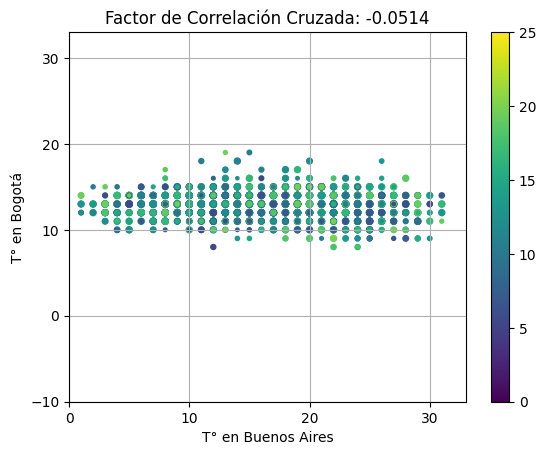

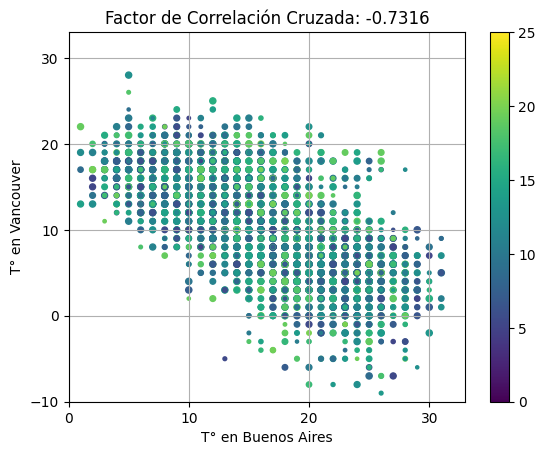

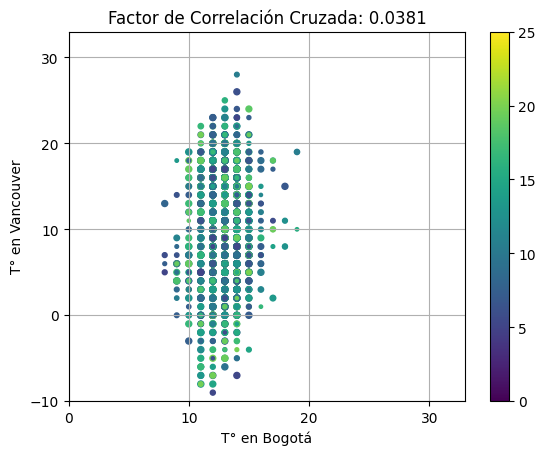

In [265]:
def getPlot(d1,d2,result):
  fig, ax = plt.subplots()
  sizes = np.random.uniform(5, 20, len(d1[1]))
  colors = np.random.uniform(5, 20, len(d1[1]))
  scatter = ax.scatter(d1[1], d2[1], s=sizes, c=colors, vmin=0, vmax=25)
  ax.set(xlim=(0, 33), xticks=np.arange(10, 10),
        ylim=(-10, 33), yticks=np.arange(10, 10))
  ax.set_xticks(np.arange(0, 34, 10))
  ax.set_yticks(np.arange(-10, 34, 10))
  ax.grid(True)
  # Mostrar el gráfico
  plt.title(f"Factor de Correlación Cruzada: {result}")
  plt.xlabel(f'{d1[0]}')
  plt.ylabel(f'{d2[0]}')
  plt.colorbar(scatter, ax=ax)  # Añadir una barra de color para los puntos
  plt.show()
  print()

getPlot(('T° en Buenos Aires',S1_buenosAires),('T° en Bogotá',S2_bogota),round(factor_CC[0][1],4))
getPlot(('T° en Buenos Aires',S1_buenosAires),('T° en Vancouver',S3_vancouver),round(factor_CC[0][2],4))
getPlot(('T° en Bogotá',S2_bogota),('T° en Vancouver',S3_vancouver),round(factor_CC[1][2],4))

## **Consigna [ 2 ]**
A partir de cada una de las señales $S_i$ se desea crear una nueva señal $T_i$  que indique si la temperatura $t$ registrada cada día es Baja, Alta o Moderada, considerando los siguientes rangos: \
**(B)**aja: $t < 10$ \
**(M)**oderada: $10 \leq t < 20$ \
**(A)**lta: $t \geq 20$

Modelar cada nueva señal Ti  como una fuente markoviana, obteniendo su matriz de pasaje, y: \

1.   Calcular la entropía de cada fuente, con y sin memoria. Interpretar y comparar.
2.   Generar un conjunto de códigos mediante Huffman para los símbolos de cada señal Ti original y para la extensión de cada señal a orden 2 (Ti2). Calcular la longitud promedio de cada codificación y analizar según el 1° teorema de Shannon.
3. Calcular la longitud total en bits de cada señal codificada con Huffman y obtener la tasa de compresión obtenida respecto del tamaño del archivo original.

**Nota**: no se requiere almacenar el archivo comprimido “a nivel bit”, pero sí tomar en cuenta el tamaño correspondiente en bits para los cálculos

---
### **Categorización de las temperaturas**

El método de categorización recorre la fuente dada elemento a elemento, categorizando cada valor de temperatura según el criterio dado (Alta, Media, Baja). Retorna una lista equivalente cuyos valores se reducen a un alfabeto de tres símbolos: 'A', 'B', 'M'. \
Esta simplificación resulta inevitablemente en pérdida de información.

In [267]:
# Categoriza cada valor de temperatura de la fuente dada en (A)lta, (M)edia o (Baja).
def categorized(city,data):
  result = []
  # Conteos de ocurrencias con el fin de calcular probabilidades sin recorrer nuevamente las fuentes
  count_cat = {'A': 0, 'M': 0, 'B': 0}
  count_cat_pair = {'A/A': 0, 'M/A': 0, 'B/A': 0, 'A/M': 0, 'M/M': 0, 'B/M': 0, 'A/B': 0, 'M/B': 0, 'B/B': 0}
  s_anterior = ''
  for t in range(len(data)):
    if data[t] < 10:
      s = 'B'
    elif data[t] < 20:
      s = 'M'
    else:
      s = 'A'
    result.append(s)
    count_cat[s] += 1
    if t%2==0:
      s_anterior = s
    else:
      count_cat_pair[f'{s}/{s_anterior}'] += 1
  return [[city,count_cat,count_cat_pair]] + result       # count_cat contiene el número de ocurrencias de cada categoría

cat_S1 = categorized('S1',S1_buenosAires)
cat_S2 = categorized('S2',S2_bogota)
cat_S3 = categorized('S3',S3_vancouver)

# Display de las ocurrencias de cada categoría + los datos categorizados
print('Buenos Aires: ',cat_S1[0][1],'\t',   cat_S1[1:])
print('Bogota:       ',cat_S2[0][1],'\t\t', cat_S2[1:])
print('Vancouver:    ',cat_S3[0][1],'\t',   cat_S3[1:])

Buenos Aires:  {'A': 2406, 'M': 3542, 'B': 992} 	 ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'M', 'M', 'M', 'A', 'A', 'A', 'A', 'A', 'M', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'M', 'M', 'A', 'A', 'M', 'M', 'A', 'M', 'M', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'M', 'A', 'A', 'A', 'M', 'M', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'M', 'M', 'M', 'A', 'M', 'M', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'M', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'M', 'A', 'A', 'M', 'M', 'M', 'M', 'M', 'M', 'A', 'A', 'A', 'A', 'A', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'A', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',

---
### **Matriz de transición**

In [269]:
# NOTA: En este paso nos deshacemos de los problemas asociados al dataset de Bogotá.

# Mapa: símbolo <-> índice de la matriz
def getIndex(cat_data):
  order = ['A','M','B']
  index = {}
  i = 0
  for s in order:
    if cat_data[s]>0:
      index[s] = i
      i += 1
  return index

indexes = {}

# Dada una fuente categorizada devuelve su matriz de transición de estados
def getMatrizDeTransicion(temperaturas):

  id_ciudad = temperaturas[0][0]        # separación de los datos de entrada: identificador de la ciudad por un lado,
  conteo_cat = temperaturas[0][1]       # conteo de cada categoría por otro lado,
  data_temp = temperaturas[1:]          # lista de datos categorizados por último

  index = getIndex(conteo_cat) # obtención del índice en función de los datos
  indexes[id_ciudad] = index
  n = len(index)                    # n = número de símbolos presentes
  matriz = np.zeros((n,n))          # inicialización de la matriz de nxn con ceros

  # Recorrido y conteo de la ocurrencia de cada par de símbolos (matriz conjunta)
  for i in range(1,len(data_temp)):
    matriz[index[data_temp[i]], index[data_temp[i-1]]] +=1

  # Cálculo de probabilidad condicional: valor[i][j]/sum_col[j]
  for i in index:
    for j in index:   # considerar que ya teníamos calculado el conteo de ocurrencias del símbolo j en conteo_cat[j]
      matriz[index[i]][index[j]] = matriz[index[i]][index[j]] / conteo_cat[j]

  return matriz


matriz_S1 = getMatrizDeTransicion(cat_S1);
matriz_S2 = getMatrizDeTransicion(cat_S2);
matriz_S3 = getMatrizDeTransicion(cat_S3);

print('Matrices de transición de S1, S2 y S3 en ese orden:\n')
print(tabulate(matriz_S1, headers=["↙ ","A", "M", "B"], showindex=["A", "M", "B"], tablefmt="orgtbl"),'\n')
print(tabulate(matriz_S2, headers=["↙ ","M", "B"], showindex=["M", "B"], tablefmt="orgtbl"),'\n')
print(tabulate(matriz_S3, headers=["↙ ","A", "M", "B"], showindex=["A", "M", "B"], tablefmt="orgtbl"),'\n')

Matrices de transición de S1, S2 y S3 en ese orden:

| ↙    |        A |         M |        B |
|------+----------+-----------+----------|
| A    | 0.818371 | 0.123094  | 0        |
| M    | 0.181214 | 0.790232  | 0.309476 |
| B    | 0        | 0.0866742 | 0.690524 | 

| ↙    |          M |    B |
|------+------------+------|
| M    | 0.996819   | 0.84 |
| B    | 0.00303688 | 0.16 | 

| ↙    |        A |         M |         B |
|------+----------+-----------+-----------|
| A    | 0.595855 | 0.0233883 | 0         |
| M    | 0.404145 | 0.907646  | 0.0674091 |
| B    | 0        | 0.0689655 | 0.932298  | 



---
### **Probabilidades Marginales**

In [270]:
# Cálculo de probabilidades haciendo uso del conteo calculado previamente
def getDistribucion(conteo):

  probabilidades = {}
  total = sum(conteo.values())      # ocurrencias totales = cantidad de datos = 6940

  for s in conteo:
    if conteo[s] > 0:               # evita probabilidades nulas
      probabilidades[s] = conteo[s]/total   # p(s) = #ocurrencias_s / #datos

  return probabilidades

# Para calcular las probabilidades marginales no es necesario volver a recorrer los datos!
dist_S1 = getDistribucion(cat_S1[0][1])  # Pasamos solo el conteo de símbolos como parámetro
dist_S2 = getDistribucion(cat_S2[0][1])
dist_S3 = getDistribucion(cat_S3[0][1])

print('Probabilidades marginales de cada símbolo:')
print('Buenos Aires: ',dist_S1)
print('Bogotá:       ',dist_S2)
print('Vancouver:    ',dist_S3)

Probabilidades marginales de cada símbolo:
Buenos Aires:  {'A': 0.346685878962536, 'M': 0.5103746397694524, 'B': 0.14293948126801154}
Bogotá:        {'M': 0.9963976945244957, 'B': 0.0036023054755043226}
Vancouver:     {'A': 0.02780979827089337, 'M': 0.48054755043227665, 'B': 0.49164265129683}


---
### **Entropía**

In [271]:
# H = - sum( pi * log2(pi) )
def getEntropia_SM(distribucion):
  suma = 0
  for i in distribucion:
    pi = distribucion[i]
    if pi > 0:
      suma += pi * np.log2(pi)
  return suma*(-1)

#### **Sin memoria**

In [272]:
entropia_SM_S1 = getEntropia_SM(dist_S1)
entropia_SM_S2 = getEntropia_SM(dist_S2)
entropia_SM_S3 = getEntropia_SM(dist_S3)

print('Entropía para la fuente S1 -Buenos Aires- sin memoria: ',entropia_SM_S1)
print('Entropía para la fuente S2 -Bogotá- sin memoria:       ',entropia_SM_S2)
print('Entropía para la fuente S3 -Vancouver- sin memoria:    ',entropia_SM_S3)

Entropía para la fuente S1 -Buenos Aires- sin memoria:  1.4262557016176838
Entropía para la fuente S2 -Bogotá- sin memoria:        0.034427079101625305
Entropía para la fuente S3 -Vancouver- sin memoria:     1.1553851439352645


#### **Con memoria**

In [273]:
def getDistribucionCondicional(ciudad, i, matrizDeTransicion):
  dist_cond = {}
  index = indexes[ciudad]
  for j in index:
    if matrizDeTransicion[index[i]][index[j]] != 0:
      dist_cond[f'{j}/{i}'] = matrizDeTransicion[index[j]][index[i]]
  return dist_cond

def getEntropia_CM(ciudad, distribucion, matrizDeTransicion):
  suma = 0
  for i in distribucion:
    dist_dado_i = getDistribucionCondicional(ciudad, i, matrizDeTransicion)
    suma += distribucion[i] * getEntropia_SM(dist_dado_i)
  return suma

entropia_CM_S1 = getEntropia_CM('S1',dist_S1,matriz_S1)
entropia_CM_S2 = getEntropia_CM('S2',dist_S2,matriz_S2)
entropia_CM_S3 = getEntropia_CM('S3',dist_S3,matriz_S3)

print('Entropía para la fuente S1 -Buenos Aires- con memoria (orden 1): ',entropia_CM_S1)
print('Entropía para la fuente S2 -Bogotá- con memoria (orden 1):       ',entropia_CM_S2)
print('Entropía para la fuente S3 -Vancouver- con memoria (orden 1):    ',entropia_CM_S3)

Entropía para la fuente S1 -Buenos Aires- con memoria (orden 1):  0.8473691887617005
Entropía para la fuente S2 -Bogotá- con memoria (orden 1):        0.03215758002947199
Entropía para la fuente S3 -Vancouver- con memoria (orden 1):     0.45210269269218595


---
### **Codificación de Huffman**

- El método de codificación de Huffman recibe un diccionario en el que las claves son cada símbolo y los valores asociados son las respectivas probabilidades de que aparezcan en la cadena.
- La convención es que, en cada iteración al seleccionar los dos símbolos de menor probabilidad, el de la menor recibe un 0 y el de la mayor un 1.
- Retorna una codificación en formato diccionario donde las claves son los símbolos y los valores son las codificaciones asociadas.

In [274]:
# Calculo de las probabilidades conjuntas para orden 2 (sin memoria)
def distOrden2_SM(dist):
  dist_conj = {}
  for i in dist:
    for j in dist:
      if dist[i]!=0 and dist[j]!=0:
        dist_conj[f'{i}{j}'] = dist[i] * dist[j]
  return dist_conj

# Calculo de las probabilidades conjuntas para orden 2 (con memoria)
def distOrden2_CM(ciudad,dist,matrizCond):
  dist_conj = {}
  index = indexes[ciudad]
  for i in dist:
    for j in dist:
      col = getDistribucionCondicional(ciudad,i,matrizCond)
      if dist[i]!=0 and f'{j}/{i}' in col.keys():
        dist_conj[f'{j}/{i}'] = dist[i] * col[f'{j}/{i}']
  # print(sum(dist_conj.values()))      # Verificar que sume (aproximadamente) 1
  return dist_conj

dist_S1_orden2_CM = distOrden2_CM('S1',dist_S1,matriz_S1)
dist_S2_orden2_CM = distOrden2_CM('S2',dist_S2,matriz_S2)
dist_S3_orden2_CM = distOrden2_CM('S3',dist_S3,matriz_S3)
print('S1  ',dist_S1_orden2_CM)
print('S2  ',dist_S2_orden2_CM)
print('S3  ',dist_S3_orden2_CM)

S1   {'A/A': 0.28371757925072044, 'M/A': 0.06282420749279538, 'A/M': 0.06282420749279538, 'M/M': 0.40331412103746395, 'B/M': 0.044236311239193075, 'M/B': 0.04423631123919308, 'B/B': 0.09870317002881845}
S2   {'M/M': 0.9932276657060519, 'B/M': 0.003025936599423631, 'M/B': 0.003025936599423631, 'B/B': 0.0005763688760806917}
S3   {'A/A': 0.016570605187319884, 'M/A': 0.011239193083573486, 'A/M': 0.011239193083573486, 'M/M': 0.4361671469740634, 'B/M': 0.03314121037463977, 'M/B': 0.03314121037463977, 'B/B': 0.45835734870317}


In [275]:
# Cálculo de longitud de la codificación
def length(dist,codificacion):
  l = 0
  for i in dist.keys():
    l += dist[i] * len(codificacion[i])
  return l

In [278]:
# p_dist está en formato diccionario, donde la clave es el símbolo y el valor es su probabilidad.
def getHuffmanCoding(p_dist):
    code = {key: '' for key in p_dist}          # diccionario con todos los símbolos.
    p_queue = p_distribution_list(p_dist)       # distribución de probabilidades en formato lista.
    p_queue.sort(reverse=True)                  # fila de prioridad: de mayor a menor.

    for i in range(len(p_dist)-1):              # FOR LOOP -> n-1 iteraciones:

        less_likely = p_queue.pop()                             # 1. Seleccionar los dos elementos con la menor probabilidad.
        second_less_likely = p_queue.pop()

        for i in less_likely[1]:                                # 2. Bifurcarlos entre 0 (izquierda) y 1 (derecha).
            code[i] = '0' + code[i]                             #    Actualizar el diccionario code de todos los símbolos involucrados.
        for i in second_less_likely[1]:
            code[i] = '1' + code[i]

        p_queue.append(join(less_likely,second_less_likely))    # 3. Combinar ambos elementos sumando su probabilidad y reinsertando el nuevo elemento en la lista.

        p_queue.sort(reverse=True)                              # 4. Reordenar la lista según las probabilidades actualizadas.

    print('Length: ',round(length(p_dist,code),3),'\t',code)
    return code                                 # retorna cada símbolo con su código correspondiente.

def join(s1, s2):
    sum = round(s1[0]+s2[0],3)
    symbols = s1[1] + s2[1]
    return [ sum, symbols ]

def p_distribution_list(p_distribution_dict):
    list = []
    for i in p_distribution_dict:
        element = [p_distribution_dict[i],[i]]
        list.append(element)
    return list

In [279]:
print('Codificación de Orden 1:')
cod_S1 = getHuffmanCoding(dist_S1)
cod_S2 = getHuffmanCoding(dist_S2)
cod_S3 = getHuffmanCoding(dist_S3)
print('\nCodificación de Orden 2 (con memoria):')
cod_S1_o2 = getHuffmanCoding(dist_S1_orden2_CM)
cod_S2_o2 = getHuffmanCoding(dist_S2_orden2_CM)
cod_S3_o2 = getHuffmanCoding(dist_S3_orden2_CM)

Codificación de Orden 1:
Length:  1.49 	 {'A': '01', 'M': '1', 'B': '00'}
Length:  1.0 	 {'M': '1', 'B': '0'}
Length:  1.508 	 {'A': '10', 'M': '11', 'B': '0'}

Codificación de Orden 2 (con memoria):
Length:  2.311 	 {'A/A': '10', 'M/A': '1101', 'A/M': '1100', 'M/M': '0', 'B/M': '11100', 'M/B': '11101', 'B/B': '1111'}
Length:  1.01 	 {'M/M': '1', 'B/M': '011', 'M/B': '00', 'B/B': '010'}
Length:  1.774 	 {'A/A': '1000', 'M/A': '10011', 'A/M': '10010', 'M/M': '11', 'B/M': '1010', 'M/B': '1011', 'B/B': '0'}


#### Verificación: 1er Teorema de Shannon
La longitud de la codificación dividido el orden n debe encontrarse entre su entropía y su entropía más 1/n para que la codificación se considere correcta.

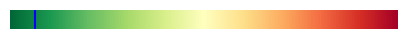

La codificación de S1 de orden 1 se verifica con Shannon?: True


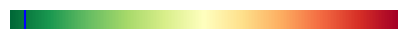

La codificación de S1 de orden 2 se verifica con Shannon?: True


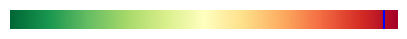

La codificación de S2 de orden 1 se verifica con Shannon?: True


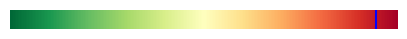

La codificación de S2 de orden 2 se verifica con Shannon?: True


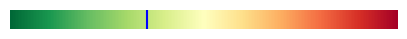

La codificación de S3 de orden 1 se verifica con Shannon?: True


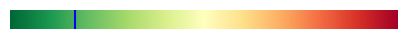

La codificación de S3 de orden 2 se verifica con Shannon?: True


In [280]:
# Función que grafica la longitud promedio por símbolo acotada por la entropía
def displayCodeQuality(cota_inf,valor,cota_sup):
  fig, ax = plt.subplots(figsize=(5, 0.25))
  cmap = plt.get_cmap('RdYlGn_r')
  norm = plt.Normalize(cota_inf, cota_sup)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  escala = int((cota_sup-cota_inf)*1000)
  gradient = np.linspace(cota_inf, cota_sup, escala).reshape(1, -1)
  gradient = np.vstack((gradient, gradient))
  ax.imshow(gradient, aspect='auto', cmap=cmap, norm=norm)
  # Graficar el valor entre las cotas
  ax.axvline(x= (valor - cota_inf) / (cota_sup - cota_inf) * escala, color='blue')
  ax.set_axis_off()

  plt.show()

def checksShannon_SM(dist,entropia,coding,n):
  l = length(dist,coding)
  displayCodeQuality(entropia,l/n,entropia+1/n)
  return entropia <= l/n <= entropia + 1/n

def checksShannon_CM(dist,entropia_SM,entropia_CM,coding,n):
  l = length(dist,coding)
  cota_inf = entropia_SM/n + (1-1/n) * entropia_CM
  cota_sup = cota_inf + 1/n
  displayCodeQuality(cota_inf,l/n,cota_sup)
  return cota_inf <= l/n <= cota_sup

# Codificaciones de orden 1
print('La codificación de S1 de orden 1 se verifica con Shannon?: '+str(checksShannon_SM(dist_S1,entropia_SM_S1,cod_S1,1)))
print('La codificación de S1 de orden 2 se verifica con Shannon?: '+str(checksShannon_CM(dist_S1_orden2_CM,entropia_SM_S1,entropia_CM_S1,cod_S1_o2,2)))
print('La codificación de S2 de orden 1 se verifica con Shannon?: '+str(checksShannon_SM(dist_S2,entropia_SM_S2,cod_S2,1)))
print('La codificación de S2 de orden 2 se verifica con Shannon?: '+str(checksShannon_CM(dist_S2_orden2_CM,entropia_SM_S2,entropia_CM_S2,cod_S2_o2,2)))
print('La codificación de S3 de orden 1 se verifica con Shannon?: '+str(checksShannon_SM(dist_S3,entropia_SM_S3,cod_S3,1)))
print('La codificación de S3 de orden 2 se verifica con Shannon?: '+str(checksShannon_CM(dist_S3_orden2_CM,entropia_SM_S3,entropia_CM_S3,cod_S3_o2,2)))
# Codificaciones de orden 2

#### Tasa de Compresión

In [284]:
# NOTA: para el cálculo de tasa de compresión solo se tiene en cuenta el contenido
#       importante de los archivos, despreciando cuestiones como el encabezado,
#       porible presencia de metadatos, espacios en blanco o caracteres de new line.

# Tamaño estimado del archivo original en bits (sin categorizar ni comprimir)
def original_size(data):
  bits = 0
  for d in data:
    bits += len(str(d)) * 8
  return bits

# Tamaño estimado del archivo comprimido en bits
def comp_size(cat_count,coding,orden = 1):
  bits = 0
  for simbolo in cat_count:
    # cantidad de ocurrencias del símbolo en la fuente * longitud de su codificación (bits)
    if simbolo in cat_count.keys() and simbolo in coding.keys():
      bits += cat_count[simbolo] * len(coding[simbolo])
  #print(bits)
  return bits

def getTasaDeCompresion(t_orig, t_comp):
  n = t_orig / t_comp
  return f'{round(n,2)}:1'

t_orig_S1 = original_size(S1_buenosAires)
t_comp_S1_o1 = comp_size(cat_S1[0][1],cod_S1)
t_comp_S1_o2 = comp_size(cat_S1[0][2],cod_S1_o2)

t_orig_S2 = original_size(S2_bogota)
t_comp_S2_o1 = comp_size(cat_S2[0][1],cod_S2)
t_comp_S2_o2 = comp_size(cat_S2[0][2],cod_S2_o2)

t_orig_S3 = original_size(S3_vancouver)
t_comp_S3_o1 = comp_size(cat_S3[0][1],cod_S3)
t_comp_S3_o2 = comp_size(cat_S3[0][2],cod_S3_o2)

print('Tasas de compresión de Buenos Aires:')
print('Codificación orden 1:    ',getTasaDeCompresion(t_orig_S1,t_comp_S1_o1))
print('Codificación orden 2:    ',getTasaDeCompresion(t_orig_S1,t_comp_S1_o2),'\n')

print('Tasas de compresión de Bogotá:')
print('Codificación orden 1:    ',getTasaDeCompresion(t_orig_S2,t_comp_S2_o1))
print('Codificación orden 2:    ',getTasaDeCompresion(t_orig_S2,t_comp_S2_o2),'\n')

print('Tasas de compresión de Vancouver:')
print('Codificación orden 1:    ',getTasaDeCompresion(t_orig_S3,t_comp_S3_o1))
print('Codificación orden 2:    ',getTasaDeCompresion(t_orig_S3,t_comp_S3_o2),'\n')

Tasas de compresión de Buenos Aires:
Codificación orden 1:     9.97:1
Codificación orden 2:     12.89:1 

Tasas de compresión de Bogotá:
Codificación orden 1:     15.97:1
Codificación orden 2:     31.65:1 

Tasas de compresión de Vancouver:
Codificación orden 1:     8.08:1
Codificación orden 2:     13.84:1 



## **Consigna [ 3 ]**

Se quiere analizar las características de un canal de información que transmite las temperaturas promedio registradas en una ciudad. Para ello se tiene la señal envíada S1 y la señal recibida S4.


1.   Crear una nueva señal T4, a partir de S4, teniendo en cuenta los rangos del
ejercicio 2 y obtener la matriz del  canal a partir de las señales T1 (entrada) y T4 (salida). \
2. Calcular el ruido y la información mutua del canal y analizar sus valores.\
3. Mediante simulación computacional (generando aleatoriamente la entrada y la salida correspondiente del canal según las distribuciones de probabilidad correspondientes), obtenga la probabilidad de que entre dos apariciones consecutivas de un mismo símbolo j a la salida del canal, se obtengan hasta N símbolos distintos de j. Analice los resultados para distintos valores de j y N. Incluya un gráfico de convergencia.
Ejemplo: para el símbolo j= (B)aja, en la secuencia de salidas del canal B M B M A A A M B M M M B se han generado 1, 5 y 3 símbolos distintos de B, respectivamente.



---
### **Matrices del canal**

In [285]:
# Obtención de matriz del canal (conjunta)
def matrizCanal(entrada, salida):

  index = indexes[entrada[0][0]]
  n = len(index)
  matriz = np.zeros((n,n))

  for i in range (len(entrada[1:])):
    matriz[index[salida[i+1]],index[entrada[i+1]]] += 1
  matriz = matriz/len(entrada)

  return matriz

# Obtención de matriz condicional a partir de la conjunta
def getMatrizCond(matrizConjunta):
  suma_columnas = matrizConjunta.sum(axis=0)    # Arreglo con la suma de cada columna
  matrizCond = matrizConjunta / suma_columnas   # Cada elemento se divide por la suma de su columna
  return matrizCond

cat_S4 = categorized('S4',S4_buenosAiresR)      # Datos de S4 categorizados
dist_S4 = getDistribucion(cat_S4[0][1])         # Probabilidades marginales de S4
matrizC = (matrizCanal(cat_S1, cat_S4))         # Matriz conjunta del canal
condicional = (getMatrizCond(matrizC))          # Matriz condicional del canal

print('\nMATRIZ CONJUNTA\n')
print(tabulate(matrizC, headers=["↙ ","A", "M", "B"], showindex=["A", "M", "B"], tablefmt="orgtbl"),'\n')

print('Probabilidades marginales de entrada:  ',dist_S1)
print('Probabilidades marginales de salida:   ',dist_S4)

# Obtención de la matriz condicional a partir de la conjunta
print('\nMATRIZ CONDICIONAL\n')
print(tabulate(condicional, headers=["↙ ","A", "M", "B"], showindex=["A", "M", "B"], tablefmt="orgtbl"),'\n')


MATRIZ CONJUNTA

| ↙    |         A |         M |         B |
|------+-----------+-----------+-----------|
| A    | 0.293762  | 0.0314076 | 0         |
| M    | 0.0528742 | 0.437257  | 0.0198819 |
| B    | 0         | 0.0416367 | 0.123037  | 

Probabilidades marginales de entrada:   {'A': 0.346685878962536, 'M': 0.5103746397694524, 'B': 0.14293948126801154}
Probabilidades marginales de salida:    {'A': 0.32521613832853025, 'M': 0.5100864553314121, 'B': 0.16469740634005764}

MATRIZ CONDICIONAL

| ↙    |        A |         M |        B |
|------+----------+-----------+----------|
| A    | 0.847465 | 0.0615471 | 0        |
| M    | 0.152535 | 0.856861  | 0.139113 |
| B    | 0        | 0.0815923 | 0.860887 | 



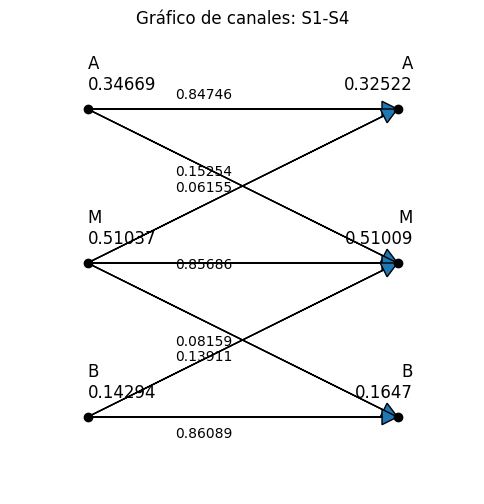

In [286]:
# NOTA: este código es para generar el gráfico de canales, no es necesario analizarlo profundamente.

# S1 -> S4
def getConnections(matrizCond):
  connections = []
  index = indexes['S1']
  for i in index:
    for j in index:
      if matrizCond[index[i]][index[j]] > 0:
        connections.append([j,i,matrizCond[index[i],index[j]]])
  return connections
#getConnections(matrizC)

def getGraficoCanal(titulo,matrizC):

  plt.figure(figsize=(6, 6))
  plt.xlim(-1.5, 1.5)
  plt.ylim(-1.5, 1.5)

  # Definición de los puntos y su ubicación en el gráfico
  points_left = {'B': (-1, -1),'M': (-1, 0),'A': (-1, 1)}
  points_right = {'B': (1, -1),'M': (1, 0),'A': (1, 1)}

  # Dibujo de los puntos con sus probabilidades
  for point in points_left.keys():      # Probabilidades de cada entrada X: son las marginales ya calculadas (dist_S1)
      plt.plot(points_left[point][0], points_left[point][1], 'ko')  # Punto negro
      plt.text(points_left[point][0], points_left[point][1] + 0.1, f"{point}\n{round(dist_S1[point],5)}", fontsize=12,
              verticalalignment='bottom', horizontalalignment='left')
  py = dist_S4                  # Probabilidades de cada salida Y: se obtienen a partir de la matriz conjunta
  for point in points_right.keys():
      plt.plot(points_right[point][0], points_right[point][1], 'ko')  # Punto negro
      plt.text(points_right[point][0] + 0.1, points_right[point][1] + 0.1, f"{point}\n{round(py[point],5)}", fontsize=12,
              verticalalignment='bottom', horizontalalignment='right')

  # Dibujo de los vectores con sus probabilidades
  vectors = getConnections(matrizC)     # Obtengo un listado de vectores con probabilidad no nula<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
  i = 0
  for vec in vectors:
      plt.arrow(points_left[vec[0]][0], points_left[vec[0]][1], points_right[vec[1]][0] - points_left[vec[0]][0], points_right[vec[1]][1] - points_left[vec[0]][1],
                head_width=0.1, head_length=0.1, length_includes_head=True)
      # Ubicación de las etiquetas en relación a las flechas
      if not np.all(matrizC == matrizC[0,0]):
        distances = [0.1, 0.5, 0.1, 0.0, 0.1, 0.5, 0.1]
        midpoint = (-0.25, (points_left[vec[0]][1] + points_right[vec[1]][1]) / 2 + distances[i] * points_left[vec[0]][1])
        plt.annotate(round(vec[2],5), midpoint, fontsize=10, ha='center', va='center_baseline')
        i += 1

  # Título y visualización del gráfico
  plt.title(f'{titulo}')
  plt.axis('off')
  plt.show()

getGraficoCanal('Gráfico de canales: S1-S4',condicional)

---
### **Ruido e información mútua del canal**

RUIDO DEL CANAL:    0.67115  ∈   [ 0.0 ,  1.58496 ]


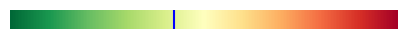


INFORMACION MUTUA:  0.77982  ∈   [ 0.0 ,  1.42626 ]


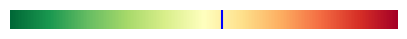

In [287]:
index = indexes['S1']

# sum(p(y/x)*log(p(y/x))) con x fijo
def r(x,dist):
  d = {}
  for k in index.keys():
    d[k] = dist[index[k]][x]
  return getEntropia_SM(d)

# Retorna un diccionario con los ruidos asociados a cada símbolo de entrada
def getRuidoColumnas(matrizCond):
  index = indexes['S1']
  ruidos = {}
  for i in index:
    ruidos[i] = r(index[i],matrizCond)
  return ruidos

# Calculo de ruido del canal
def getRuido(pX, matrizCondicional):
  ruidos = getRuidoColumnas(matrizCondicional)
  suma=0
  for i in index:
    suma += pX[i] * ruidos[i]
  return suma

def getRuidoMax(pX):        # Para tener un valor de referencia: calculamos qué pasaría en el peor caso
  n = len(index)
  p_eq = 1/n
  m = np.full((n,n),p_eq)   # Peor caso: todos los vectores tienen probabilidad 1/3
  #getGraficoCanal('Canal de la muerte: S1-S4\n- todos los vectores tienen peso 1/3 -',m)
  return getRuido(pX,m)

ruido = getRuido(dist_S1, condicional)      # Ruido del canal
max_ruido = round(getRuidoMax(dist_S1),5)            # Ruido MÁXIMO (peor canal posible)
min_ruido = 0.0                             # Ruido MÍNIMO (mejor canal posible)
print('RUIDO DEL CANAL:   ',round(ruido,5),' ∈   [',min_ruido,', ',max_ruido,']')
displayCodeQuality(min_ruido,ruido,max_ruido)
print()

def getInformacionMutua(ruido, distY):
  h = getEntropia_SM(distY)
  return h - ruido

info = getInformacionMutua(ruido,dist_S4)   # Información mútua del canal
max_info = round(getInformacionMutua(0.0,dist_S1),5) # Información mútua MÁXIMA (mejor canal posible)
min_info = 0.0                              # La información MÍNIMA (peor canal posible) es 0.0
print('INFORMACION MUTUA: ',round(info,5),' ∈   [',min_info,', ',max_info,']')
displayCodeQuality(min_info,info,max_info)

---
### **Muestreo computacional**

{'A': 0.346685878962536, 'M': 0.8570605187319884, 'B': 1.0}
[[0.84746467 0.06154715 0.        ]
 [1.         0.91840768 0.1391129 ]
 [1.         1.         1.        ]]
0.3017048081655787


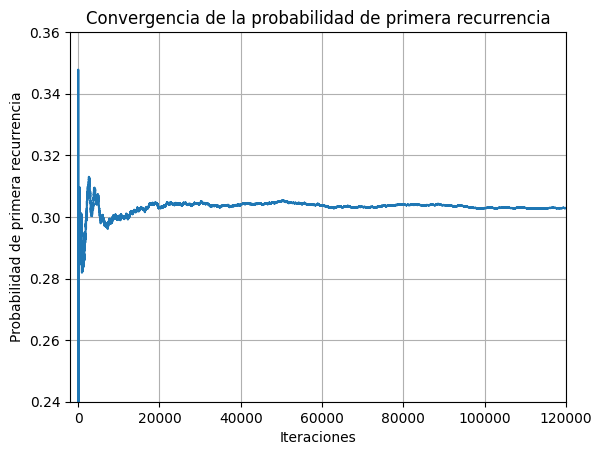

In [288]:
from math import inf
import random

dist_S1 # distribución de X
condicional # condicional Y/X


def Montecarlo(dist,mCondicional,j,n,p_values):

  epsilon = 0.0000005   # para converger, mas chico mas preciso.
  MIN_IT = 10000
  simb_dif = 3        # cant de simbolos distintos que emite la fuente (variedad).

  index = indexes['S1']
  dist_acumulada = {}
  suma_acumulada = 0.0
  for simbolo, probabilidad in dist.items():
      suma_acumulada += probabilidad
      dist_acumulada[simbolo] = suma_acumulada
  print(dist_acumulada)

  mc_acumulada = np.cumsum(mCondicional,axis=0)
  print(mc_acumulada)

  def converge(A, B) -> bool:
    return abs(A-B) <= epsilon

  def getEntrada():
    r = random.uniform(0,1)
    for i in index:
      if (r <= dist_acumulada[i]):
        return i
  # siempre va a retornar i, porque la ultima fila es 1.

  def getSalidaDadaEntrada(e):
    r = random.uniform(0,1)
    for i in range(simb_dif):
      if (r <= mc_acumulada[i][index[e]]):
        return i

  def prob_primera_recurrencia(j, n):

    t = 0
    t_ult_ret = float('-inf')
    casos_totales = 0
    casos_favorables = 0      # Retornos a 'simbolo' en 'n' pasos
    p_actual = 0      # Probabilidad de primera recurrencia actual
    p_anterior = -1   # Probabilidad de primera recurrencia anterior

    while (not converge(p_actual, p_anterior)) or t < MIN_IT:
      t += 1
      e = getEntrada()
      s = getSalidaDadaEntrada(e)

      if s == j:
        casos_totales += 1
        if (t - t_ult_ret) <= n:   # si la cantidad de pasos que llevo, es la que se pasa por parametros, es la unica q quiero tener en cuenta.
            casos_favorables += 1
        p_anterior = p_actual
        p_actual = casos_favorables / casos_totales
        t_ult_ret = t
        p_values.append(p_actual)

    return p_actual

  return prob_primera_recurrencia(j,n)

#  0:ALTA    1:MEDIA   2:BAJA
p_values = []
print(Montecarlo(dist_S1,condicional,2,2,p_values))


plt.plot(p_values)
plt.xlabel('Iteraciones')
plt.ylabel('Probabilidad de primera recurrencia')
plt.title('Convergencia de la probabilidad de primera recurrencia')
plt.grid(True)
plt.xlim(-2000,120000)
plt.ylim(0.24,0.36)
plt.show()
